# Proyecto integrado

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


## Inicialización y carga de datos

In [9]:
#importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import re
from scipy import stats as st
from matplotlib import pyplot as plt

In [10]:
#lectura del dataset y creación del dataframe a usar en el proyecto
df_games = pd.read_csv("C:/Users/steph/Documents/proyectos/proyecto_sprint6/games.csv")

In [11]:
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [12]:
#revisión general de la información
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparación de datos

Para el preprocesamiento de datos se seguirán las siguientes consideraciones:

    Los nombres de las columnas serán transformados a un formato snake_case y pasado a minúsculas.

    Se convertirán los datos en los tipos necesarios según sus registros.

    Se revisarán los casos de los registros nulos y datos duplicados. Se determinará dependiendo del tipo de información que maneje la columna si se rellenarán los registros nulos con un dato específico.



In [13]:
#se pasan los nombres de las columnas a minúsculas
columns_new = {
    "Name":"name",
    "Platform": "platform",
    "Year_of_Release": "year_of_release",
    "Genre": "genre",
    "NA_sales": "na_sales",
    "EU_sales": "eu_sales",
    "JP_sales": "jp_sales",
    "Other_sales": "other_sales",
    "Critic_Score": "critic_score",
    "User_Score": "user_score",
    "Rating": "rating"
}
df_games.rename(columns = columns_new, inplace=True)
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


**Cambio de tipos de datos**

Se cambiará el tipo de dato de la columna user_score a float64, ya que contiene datos numéricos y estaba registrada inicialmente como tipo object

In [14]:
print(df_games["user_score"].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Se puede ver en los registros de la columna user_score que los números están registrados como strings, además que existe un registro "tbd". Estos últimos registros serán reemplazados por el valor NaN para, después de ello, poder convertir el tipo de dato de la columna a tipo float.

In [15]:
df_games["user_score"] = df_games["user_score"].replace ("tbd",np.nan)

df_games["user_score"] = df_games["user_score"].astype(float)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**Revisión de registros nulos y duplicados**

In [16]:
#revisión de datos duplicados en todo el dataframe
df_games.duplicated().sum()

0

Aclaración: solo se buscan filas completamente duplicadas en todo el dataframe, ya que es esperable que existan duplicados en cada columna del dataframe, pues un videojuego puede haber salido en diferentes consolas, además algunos videojuegos pueden compartir fecha de lanzamiento, rating, etc.

In [17]:
#revisión de datos nulos en la columna name
print(df_games[df_games["name"].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


In [18]:
#se puede ver que los registros nulos de la columna name coinciden con los de la columna genre
#se reemplazarán los valores nulos de ambas columnas con la palabra "unknown", ya que no hay forma de identificar los juegos de la plataforma genesis 
df_games["name"] = df_games["name"].fillna("unknown")
df_games["genre"] = df_games["genre"].fillna("unknown")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [19]:
#se realizará el mismo procedimiento para la columna rating
df_games["rating"].fillna("unknown",inplace=True)

C:\Users\steph\AppData\Local\Temp\ipykernel_15872\2568700284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games["rating"].fillna("unknown",inplace=True)


En el caso de las columnas critic_score y user_score se optará por dejar los valores nulos tal y como están. Reemplazarlos con la media o mediana de la variable podría sesgar los datos. Además, ya que los datos que contiene la columna son de tipo cuantitativo, tampoco se pueden rellenar los valores nulos con alguna palabra como "unknown" tal como se hizo con otras columnas del dataframe. 

In [20]:
print(df_games[df_games["year_of_release"].isnull()])

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

La única columna que tiene valores ausentes es year_of_release. Al hacer una exploración de los datos en los que esa columna tiene valores nulos se puede ver que el nombre de algunos videojuegos contiene un año (p.e. Fifa soccer 2004). Entonces, se podría asumir que ese fue su año de lanzamiento y usar ese dato para rellenar algunos de los valores nulos.

In [21]:
# se define una función que recorra el dataframe y se usará match para buscar la expresión regular
def extract_year(row):
    match = re.search(r'(\d{4})', row['name'])
    if match:
        return match.group(0)
    else:
        return row['year_of_release']
df_games["re_exp_year"] = df_games.apply(extract_year,axis=1)

In [22]:
#Ahora procederemos a llenar aquellos valores encontrados con los nulos en la columna 'year_of_release':

df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games['re_exp_year'])

display(df_games[df_games['name']=='FIFA Soccer 2004']) #Utilizaremos FIFA Soccer 2004 como ejemplo

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,re_exp_year
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E,2004
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E,2004
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E,2004


In [23]:
#se elimina la columna re_exp_year y se convierte "year_of_release" a float 64

df_games = df_games.drop('re_exp_year', axis=1)

df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'])

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16463 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Como se puede ver aún existen datos nulos en la columna year_of_release. Sin embargo, estos serán dejados como nulos, pues usar una medida de tendencia central como podría ser la mediana podría ocasionar inconsistencias con la verdadera época de vigencia de las consolas o videojuegos.

In [24]:
#creación de columna de ventas totales
df_games["total_sales"]=df_games["na_sales"]+df_games["eu_sales"]+df_games["jp_sales"]+df_games["other_sales"]
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Análisis de datos

#### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [25]:
df_grouped=df_games.groupby("year_of_release")
print(df_grouped["name"].count())

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     830
2003.0     779
2004.0     764
2005.0     941
2006.0    1008
2007.0    1198
2008.0    1429
2009.0    1427
2010.0    1255
2011.0    1137
2012.0     653
2013.0     545
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


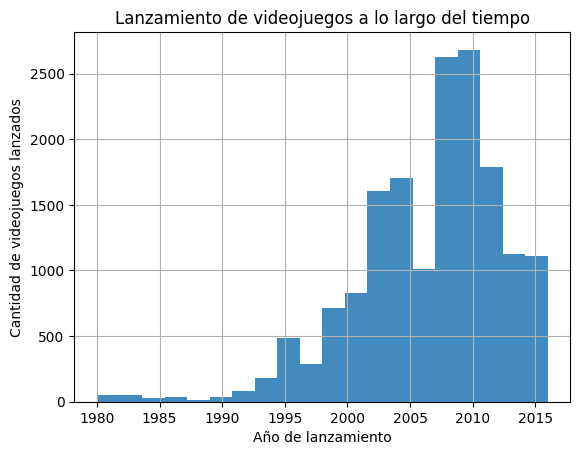

In [26]:
df_games.hist(column="year_of_release",bins=20,alpha=0.85)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de videojuegos lanzados")
plt.title("Lanzamiento de videojuegos a lo largo del tiempo")

plt.show()

A partir del gráfico, se puede ver que a partir de 1990 empieza a crecer el número de lanzamientos de videojuegos. Sin embargo, se registra una caída en el número de lanzamientos cerca al año 2005. Posteriormente, el número de lanzamientos vuelve a crecer notoriamente teniendo un pico máximo el año 2008 con 1429 videojuegos lanzados.

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [27]:
platform_sales=df_games.groupby("platform")["total_sales"].sum()
print(platform_sales.sort_values(ascending=False))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


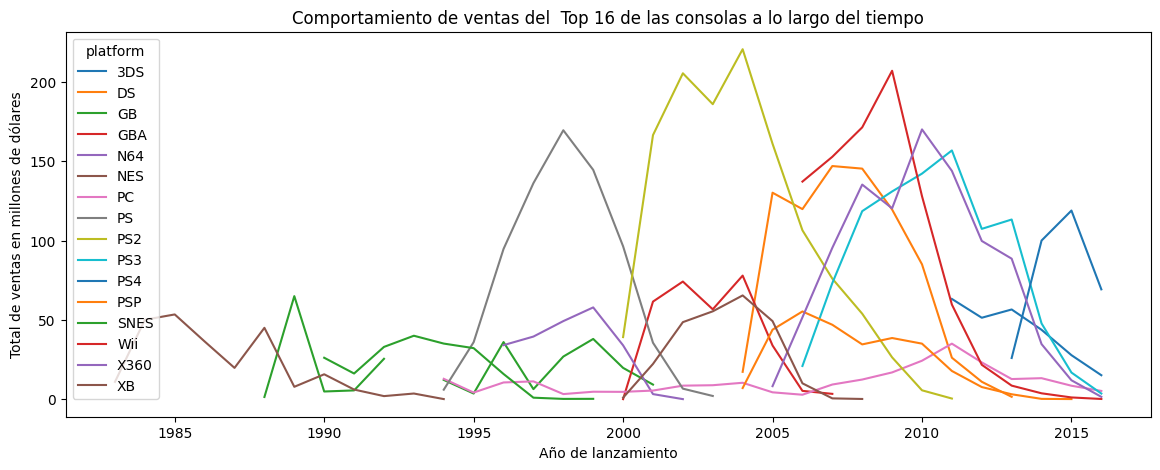

In [28]:
# en esta ocasión se seleccionarán las plataformas que hayan superado los 200 millones de dólares en ventas
platforms=["PS2","X360","PS3","Wii","DS","PS","GBA","PS4","PSP","PC","3DS","XB","GB","NES","N64","SNES"]
top_platform_sales=df_games[df_games["platform"].isin(platforms)]
top_platform_sales_pivot=top_platform_sales.pivot_table(index="year_of_release",columns="platform",values="total_sales",aggfunc="sum")
top_platform_sales_pivot.plot(figsize=[14,5],xlabel="Año de lanzamiento",ylabel="Total de ventas en millones de dólares", title="Comportamiento de ventas del  Top 16 de las consolas a lo largo del tiempo")
plt.show()

En el gráfico de líneas se puede ver que a partir de 1995 aparecen más plataformas y se incrementan en mayor medida las ventas de consolas como PS y PS2. Asimismo, se puede ver que las ventas de la plataforma PC se sostienen a lo largo del tiempo. Mientras tanto parece ser que el resto de consolas generan ventas por un periodo de 5 a 10 años. 
Para tener un número más exacto que sirva de parámetro para determinar el periodo del que se tomarán los años se calculará el tiempo promedio que tardan las nuevas plataformas nuevas en aparecer y el tiempo promedio que tardan las antiguas en desaparecer.

**¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

In [29]:
#Primero se calculará el tiempo que tardan las plataformas nuevas en aparecer
#Se asume que el primer juego que aparece para una plataforma en los registros y que tenga el año más antiguo (osea el valor mínimo) es el año en el que apareció dicha plataforma
platform_release = df_games.groupby('platform')['year_of_release'].min().sort_values(ascending=True).reset_index()

print(platform_release)

   platform  year_of_release
0      2600           1980.0
1       NES           1983.0
2        DS           1985.0
3        PC           1985.0
4        GB           1988.0
5      SNES           1990.0
6       GEN           1990.0
7        GG           1992.0
8       SCD           1993.0
9        NG           1993.0
10      SAT           1994.0
11       PS           1994.0
12      3DO           1994.0
13     TG16           1995.0
14     PCFX           1996.0
15      N64           1996.0
16       DC           1998.0
17       WS           1999.0
18      GBA           2000.0
19       XB           2000.0
20      PS2           2000.0
21       GC           2001.0
22      PSP           2004.0
23     X360           2005.0
24      PS3           2006.0
25      Wii           2006.0
26      3DS           2011.0
27      PSV           2011.0
28     WiiU           2012.0
29      PS4           2013.0
30     XOne           2013.0


In [30]:
#se creará una nueva columna al DataFrame platform_release que almacene la diferencia entre los años de lanzamiento de las plataformas:

platform_release['year_gap_release'] = platform_release['year_of_release'].diff()

print(f"El tiempo promedio que tardan las plataformas nuevas en aparecer es: ", platform_release['year_gap_release'].mean())

El tiempo promedio que tardan las plataformas nuevas en aparecer es:  1.1


In [31]:
#se calcula el tiempo que tardan las plataformas antiguas en desaparecer
#se almacenarán los valores máximos y se les restarán los valores mínimos de año de lanzamiento para obtener los valores de duración por plataforma. 
platform_release_min= df_games.groupby('platform')['year_of_release'].min()

platform_release_max = df_games.groupby('platform')['year_of_release'].max()

avg_platform_duration = (platform_release_max - platform_release_min).mean()


print("El tiempo promedio de duración de las plataformas es de:", round(avg_platform_duration,ndigits=2), "años")

El tiempo promedio de duración de las plataformas es de: 7.61 años


### Determina para qué período debes tomar datos 

En esta ocasión se seleccionarán los datos desde 1994 a 2016, debido a que es durante ese periodo que aparecen las plataformas más importantes tal como se vio en el gráfico de líneas del comportamiento de las ventas de las consolas y el histograma de lanzamiento de videojuegos.

In [34]:
# se crea un nuevo dataframe que contiene solo los datos de 1994 a 2016
df_1994_2016 = df_games[(df_games['year_of_release'] >= 1994) & (df_games['year_of_release'] < 2017)]

df_1994_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [35]:
# se considerarán como plataformas líderes a las 10 primeras plataformas que tengan más ventas
top_10_platforms=df_1994_2016.groupby("platform")["total_sales"].sum().sort_values(ascending=False)[:10].reset_index()
print(top_10_platforms)

  platform  total_sales
0      PS2      1247.28
1     X360       961.30
2      PS3       931.34
3      Wii       891.18
4       DS       802.77
5       PS       727.58
6      PS4       314.14
7      GBA       312.88
8      PSP       290.34
9      3DS       257.81


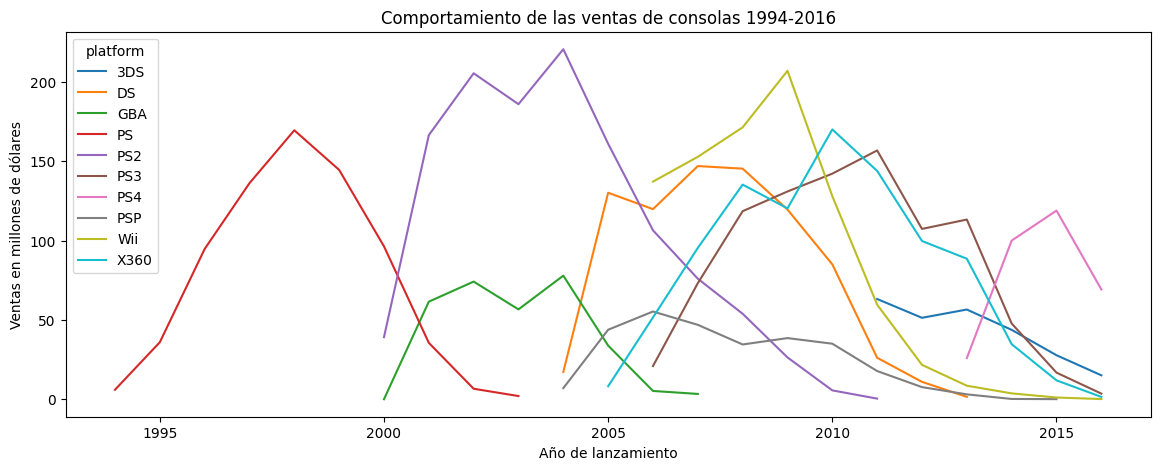

In [36]:
top_10_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
df_top_10_platforms = df_1994_2016[df_1994_2016['platform'].isin(top_10_platforms_list)][['year_of_release', 'platform', 'total_sales']]

pivot_top_10 = df_top_10_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_top_10.plot(figsize=[14,5],xlabel="Año de lanzamiento", ylabel="Ventas en millones de dólares",title= "Comportamiento de las ventas de consolas 1994-2016")
plt.show()

El gráfico permite ver que, en general, casi todas las plataformas siguen una tendencia en la que sus ventas incrementan hasta llegar a un pico y después decaen. Sin embargo, se debe resaltar el auge que tuvieron consolas como PS, PS2, Wii, X360 y PS3, las cuales superaron los 500 millones de dólares en ventas. En particular, las ventas de las consolas de la familia de Sony (PS, PS2,PS3,PS4) demuestran cómo el lanzamiento de consolas con nuevas características y tecnologías afectan a la cantidad de ventas, pues a medida que va saliendo una nueva consola y sus ventas se incrementan, las ventas de la consola pasada van disminuyendo. 

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

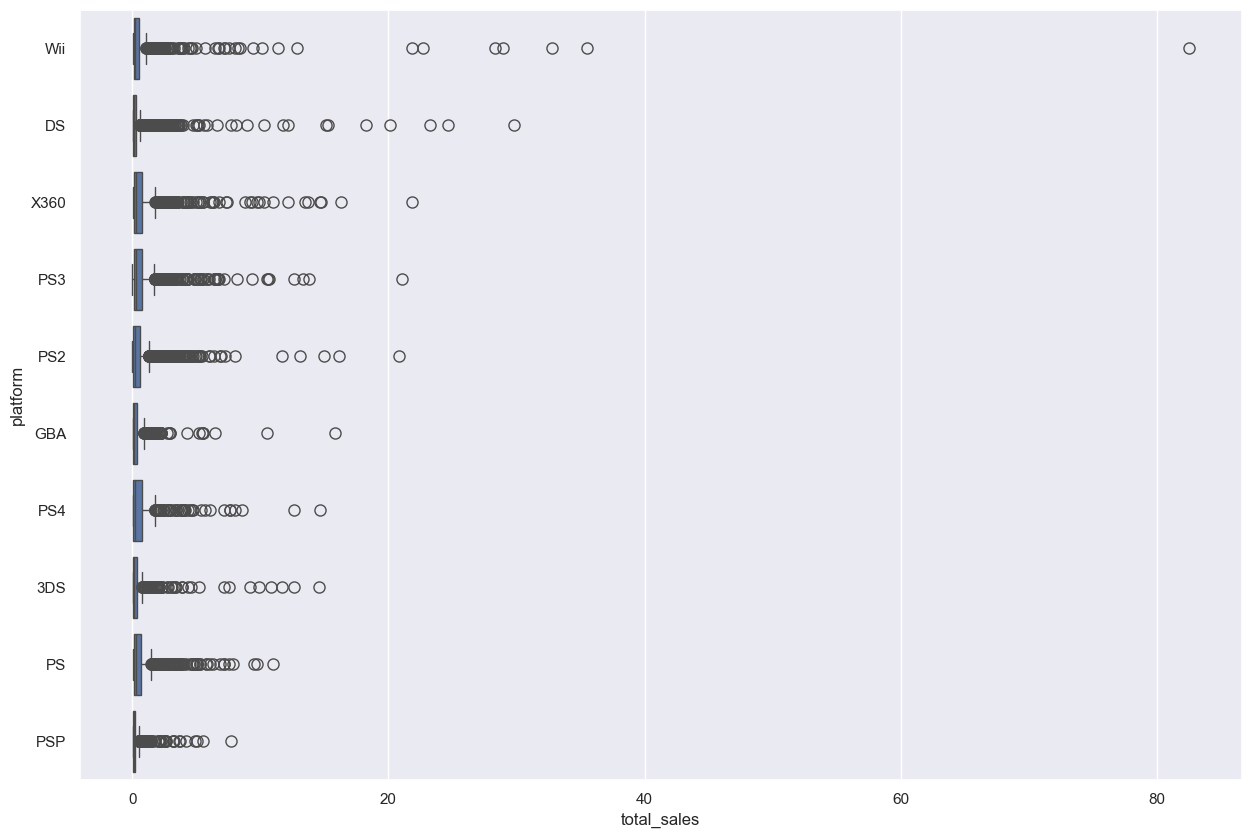

<Figure size 1500x1000 with 0 Axes>

In [37]:
sns.set_theme(rc={"figure.figsize": (15, 10)})
sns.boxplot(x="total_sales",y="platform",data=df_top_10_platforms,fliersize=8,linewidth=1)

plt.figure(figsize=(15,10))
plt.show()

In [38]:
for console in top_10_platforms_list:
    a = df_top_10_platforms[df_top_10_platforms['platform'] == console]
    description_per_console = a['total_sales'].describe()
    print(f"Plataforma: ", console)
    display(description_per_console)

Plataforma:  PS2


count    2134.000000
mean        0.584480
std         1.144168
min         0.000000
25%         0.080000
50%         0.235000
75%         0.560000
max        20.810000
Name: total_sales, dtype: float64

Plataforma:  X360


count    1234.000000
mean        0.779011
std         1.631078
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.820000
Name: total_sales, dtype: float64

Plataforma:  PS3


count    1306.000000
mean        0.713124
std         1.403065
min         0.000000
25%         0.110000
50%         0.280000
75%         0.760000
max        21.050000
Name: total_sales, dtype: float64

Plataforma:  Wii


count    1286.000000
mean        0.692986
std         3.165022
min         0.010000
25%         0.090000
50%         0.190000
75%         0.487500
max        82.540000
Name: total_sales, dtype: float64

Plataforma:  DS


count    2121.000000
mean        0.378487
std         1.436043
min         0.010000
25%         0.050000
50%         0.110000
75%         0.270000
max        29.800000
Name: total_sales, dtype: float64

Plataforma:  PS


count    1190.000000
mean        0.611412
std         1.056807
min         0.010000
25%         0.110000
50%         0.260000
75%         0.660000
max        10.950000
Name: total_sales, dtype: float64

Plataforma:  PS4


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Plataforma:  GBA


count    811.000000
mean       0.385795
std        0.899654
min        0.010000
25%        0.055000
50%        0.160000
75%        0.390000
max       15.840000
Name: total_sales, dtype: float64

Plataforma:  PSP


count    1195.000000
mean        0.242962
std         0.521874
min         0.010000
25%         0.030000
50%         0.090000
75%         0.230000
max         7.680000
Name: total_sales, dtype: float64

Plataforma:  3DS


count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: total_sales, dtype: float64

El diagrama de caja demuestra que no hay diferencias significativas en la distribución de las ventas totales por plataforma.Asimismo, al observar el promedio de las ventas totales de cada plataforma, se puede ver que los juegos no alcanzan el millón de dólares en ventas. No obstante, se puede notar que en cada plataforma existen muchos valores atípicos, es decir, videojuegos particulares cuyas ventas están muy por encima de la distribución normal de ventas.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Se seleccionará a la consola X360 para estudiar la correlación entre las reseñas y las ventas

             total_sales  user_score
total_sales     1.000000    0.113813
user_score      0.113813    1.000000


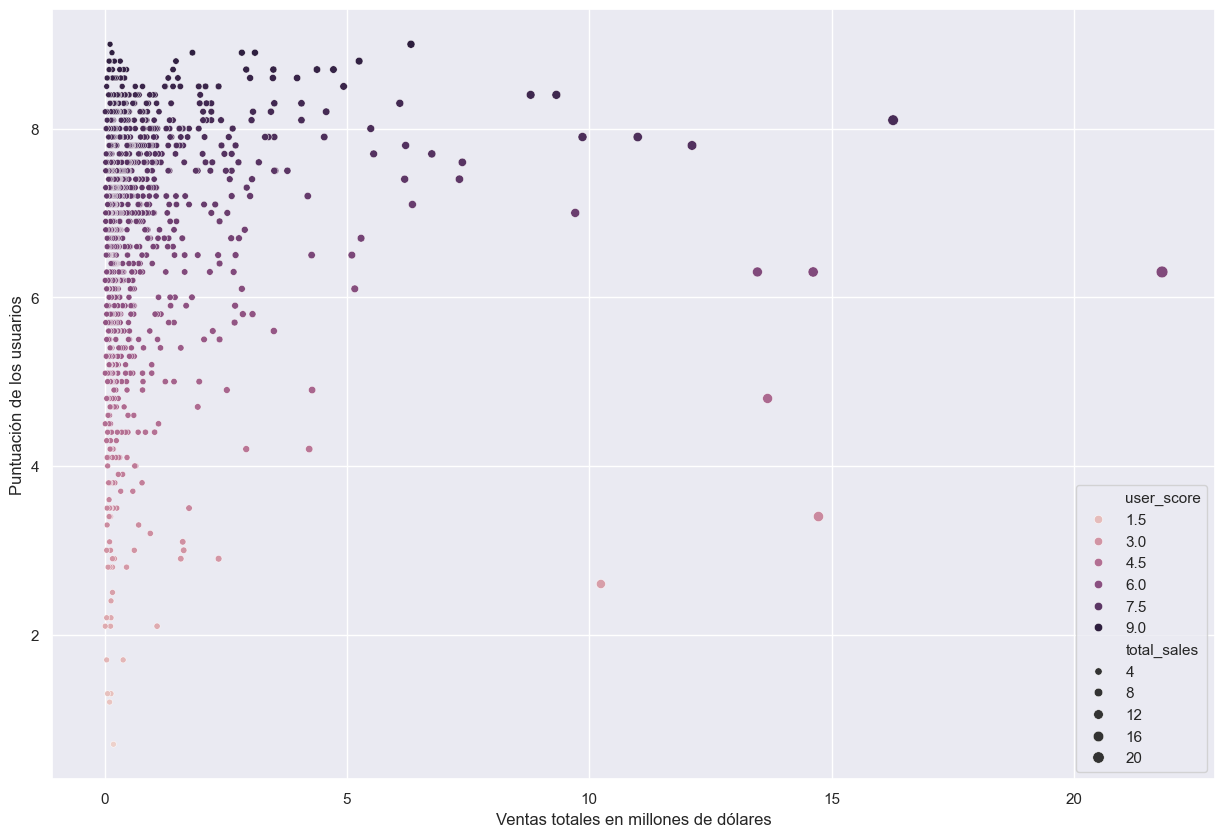

In [39]:
#primero se calculará la correlación entre las ventas y las críticas de los usuarios
x360_data = df_1994_2016[df_1994_2016["platform"]=="X360"] 
corr_x360_user = x360_data[["total_sales","user_score"]].corr()
print(corr_x360_user)

sns.scatterplot(data=x360_data,x="total_sales",y="user_score",size="total_sales",hue="user_score")
plt.xlabel("Ventas totales en millones de dólares")
plt.ylabel("Puntuación de los usuarios")
plt.show()

              total_sales  critic_score
total_sales       1.00000       0.39315
critic_score      0.39315       1.00000


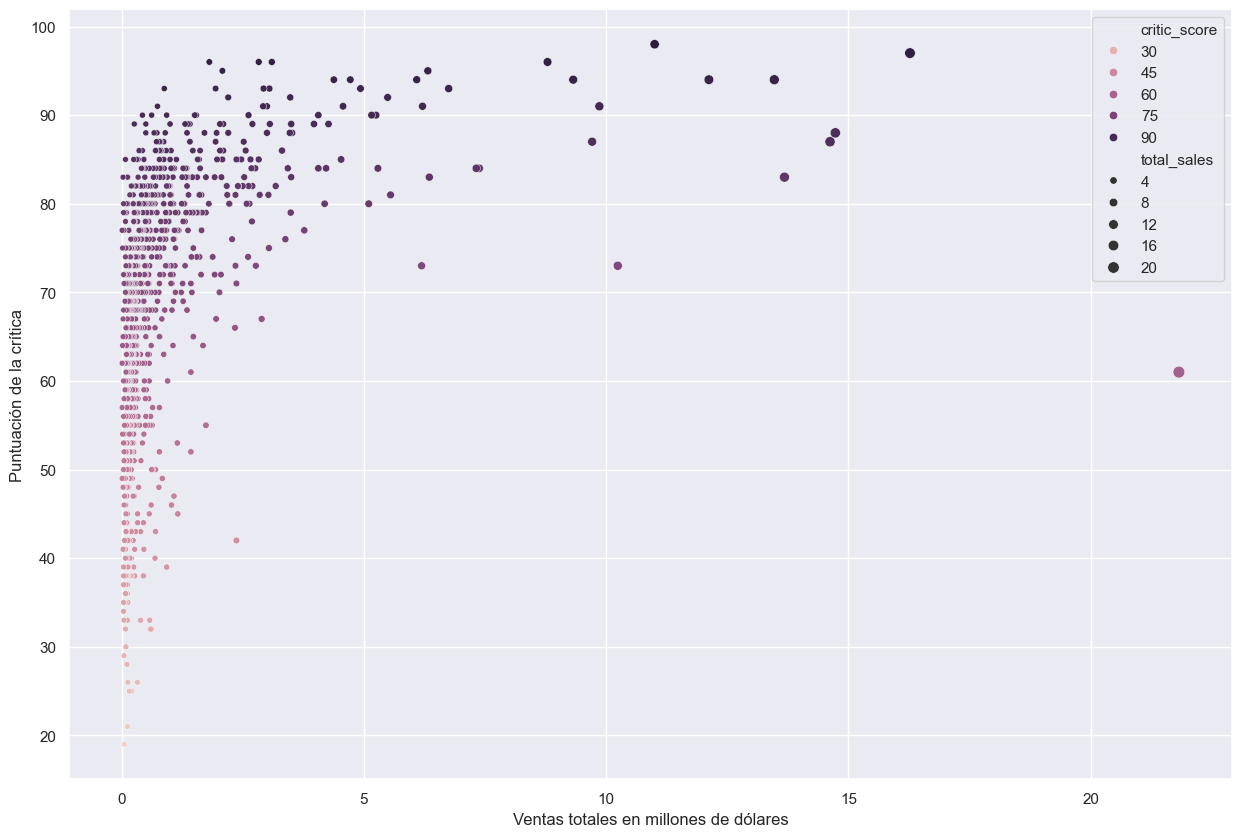

In [40]:
corr_x360_critic = x360_data[["total_sales","critic_score"]].corr()
print(corr_x360_critic)

sns.scatterplot(data=x360_data,x="total_sales",y="critic_score",size="total_sales",hue="critic_score")
plt.xlabel("Ventas totales en millones de dólares")
plt.ylabel("Puntuación de la crítica")
plt.show()

A partir del análisis se puede notar que no existe una correlación entre las reseñas de los usuarios y las ventas de los videojuegos, puesto que el coeficiente de correlación es de 0.11 entre ambas variables. Sin embargo, para el caso de las reseñas de la crítica, se puede decir que existe una correlación positiva media entre dicha variable y el número de ventas de videojuegos, ya que el coeficiente es de 0.39. Ello indicaría que existe una ligera tendencia a que a medida que incrementen las ventas de un videojuego este obtenga una mejor calificación de la crítica y viceversa. 

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [41]:
multiplatform_games = df_1994_2016[df_1994_2016["name"].duplicated(keep=False)]


#se tomarán en cuenta solo las tres plataformas que más ventas generan para hacer la comparación
df_ps2 = multiplatform_games[multiplatform_games["platform"]=="PS2"]["total_sales"]
df_x360 = multiplatform_games[multiplatform_games["platform"]=="X360"]["total_sales"]
df_ps3 = multiplatform_games[multiplatform_games["platform"]=="PS3"]["total_sales"]


print(f"Datos PS2")
print(df_ps2.describe())
print(f"Datos X360")
print(df_x360.describe())
print(f"Datos PS3")
print(df_ps3.describe())

Datos PS2
count    1028.000000
mean        0.772850
std         1.329627
min         0.000000
25%         0.160000
50%         0.390000
75%         0.800000
max        20.810000
Name: total_sales, dtype: float64
Datos X360
count    984.000000
mean       0.797368
std        1.512941
min        0.010000
25%        0.130000
50%        0.320000
75%        0.830000
max       16.270000
Name: total_sales, dtype: float64
Datos PS3
count    1033.000000
mean        0.755663
std         1.452508
min         0.010000
25%         0.130000
50%         0.330000
75%         0.830000
max        21.050000
Name: total_sales, dtype: float64


<Axes: xlabel='total_sales', ylabel='platform'>

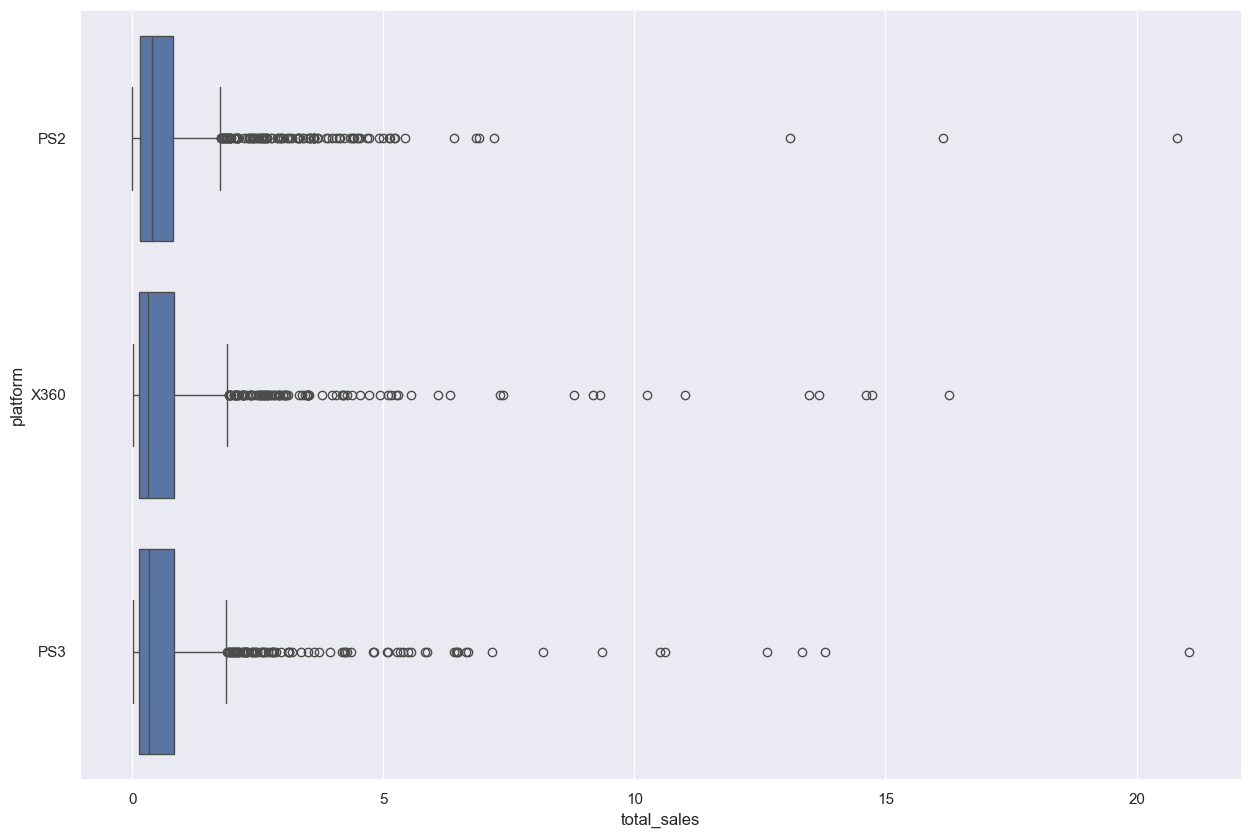

In [42]:
# se creará un diagrama de caja para observar las distribuciones de las ventas de los mismos videojuegos en cada consola
sns.boxplot(data=multiplatform_games,x="total_sales",y="platform",order=["PS2","X360","PS3"])

Los diagramas de caja muestran comportamientos similares, especialmente en la mediana, la media de la población y hasta similaridades en las desviaciones estándar.Incluso, se ven comportamientos similares tanto para los datos atípicos como para los datos dentro de la distribución normal de las muestras.

Entonces, se puede decir que el comportamiento de las ventas de videojuegos multiplataformas no varía según la plataforma en las que estos se lancen. 

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [43]:
games_per_genre = df_1994_2016.groupby("genre")["total_sales"].sum().sort_values(ascending=False).reset_index()
games_per_genre = games_per_genre.set_index("genre")
games_per_genre

,total_sales
genre,
Action,1646.97
Sports,1278.42
Shooter,976.24
Role-Playing,895.60
Misc,776.53
Racing,695.90
Platform,640.59
Fighting,414.05
Simulation,381.84


<Axes: title={'center': 'Distribución de ventas por género (1994-2016)'}, xlabel='Géneros', ylabel='Ventas en millones de dólares'>

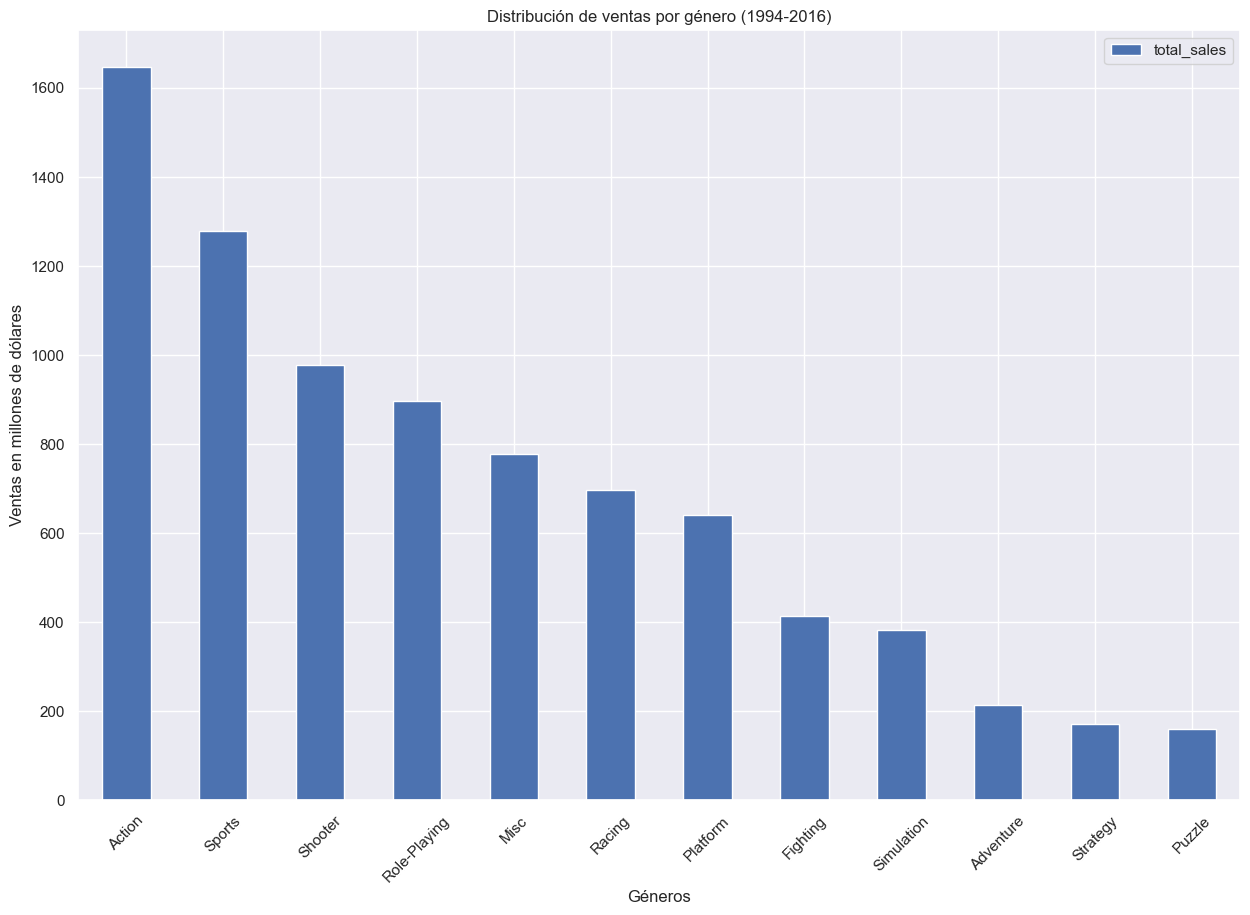

In [44]:
games_per_genre.plot(kind="bar",xlabel="Géneros",ylabel="Ventas en millones de dólares",title="Distribución de ventas por género (1994-2016)",rot=45)

El gráfico muestra que los géneros más rentables son los de acción con 1646 millones de dólares; deportes con 1278 millones y shooters con 976 millones de dólares. Por otra parte, los géneros que generan menos ventas son los de puzzle, estrategia, aventura y simulación, los cuales no llegan a superar los 400 millones de dólares.

## Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determina: Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [45]:
# se crea un dataframe que almacene las 5 plataformas principales para cada región
top_5_na = df_1994_2016.groupby('platform')['na_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_eu = df_1994_2016.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_jp = df_1994_2016.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)[:5].reset_index()

In [46]:
# se unirán los 3 dataframes creados en uno solo para poder hacer la comparación
top_5_region_comparison = top_5_na.merge(top_5_eu, how='outer', on='platform')

top_5_region_comparison = top_5_region_comparison.merge(top_5_jp, how='outer', on='platform')

top_5_region_comparison

,platform,na_sales,eu_sales,jp_sales
0,3DS,NaN,NaN,100.62
1,DS,380.32,NaN,175.00
2,PS,NaN,212.39,139.78
3,PS2,580.30,337.00,137.63
4,PS3,390.13,327.21,79.41
5,Wii,486.87,258.32,NaN
6,X360,595.74,268.37,NaN


<Axes: title={'center': 'Comparación de ventas por plataformas según región (1994-2016)'}, xlabel='Plataforma', ylabel='Total de ventas por región'>

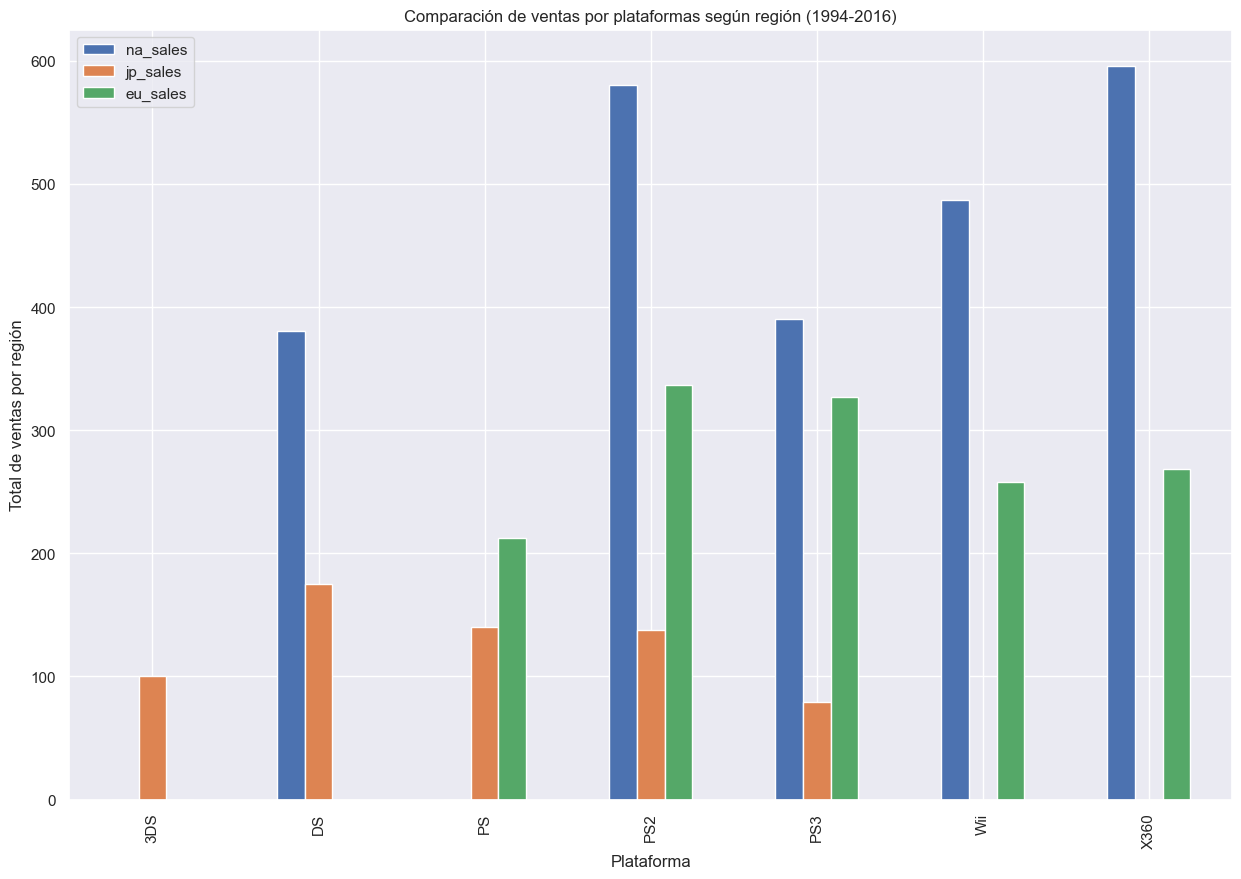

In [47]:
top_5_region_comparison.plot(kind="bar",x="platform",y=["na_sales","jp_sales","eu_sales"],title="Comparación de ventas por plataformas según región (1994-2016)",xlabel="Plataforma",ylabel="Total de ventas por región")

El gráfico demuestra que las plataformas más populares difieren según la región. Por ejemplo, se puede ver el caso de la consola 3DS, la cual obtuvo buenas ventas en Japón, pero no en Norteamérica ni Europa. En cambio, se puede ver que plataformas como X360 y Wii obtienen buenas ventas en Norteamérica y Europa, pero no en Japón. Un caso particular se puede observar en el caso del PS2 y PS3, ya que estas plataformas sí lograron buena acogida por parte de los usuarios de las tres regiones. 
Finalmente, se puede ver que la plataforma más popular en Norteamérica sería X360 con casi 600 millones de dólares en ventas. En el caso de Europa la plataforma más popular es PS2 con 337 millones de dólares en ventas,seguida muy de cerca por el PS3 con 327 millones. En el caso de Japón la consola DS es la más popular con 175 millones de dólares en ventas.

### Los cinco géneros principales. Explica la diferencia

In [48]:
top5_genres_na = df_1994_2016.groupby('genre')['na_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top5_genres_eu = df_1994_2016.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top5_genres_jp = df_1994_2016.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)[:5].reset_index()

In [49]:
top5_genres_comparison = top5_genres_na.merge(top5_genres_eu, on= 'genre', how='outer')

top5_genres_comparison = top5_genres_comparison.merge(top5_genres_jp, on= 'genre', how='outer')

top5_genres_comparison

,genre,na_sales,eu_sales,jp_sales
0,Action,814.74,503.72,147.30
1,Misc,393.92,209.69,99.97
2,Platform,NaN,NaN,84.07
3,Racing,343.42,230.82,NaN
4,Role-Playing,NaN,NaN,321.40
5,Shooter,531.30,310.80,NaN
6,Sports,664.02,371.28,109.85


<Axes: title={'center': 'Distribución de ventas según género de videojuegos por región (1994-2016)'}, xlabel='Géneros', ylabel='Total de ventas por región'>

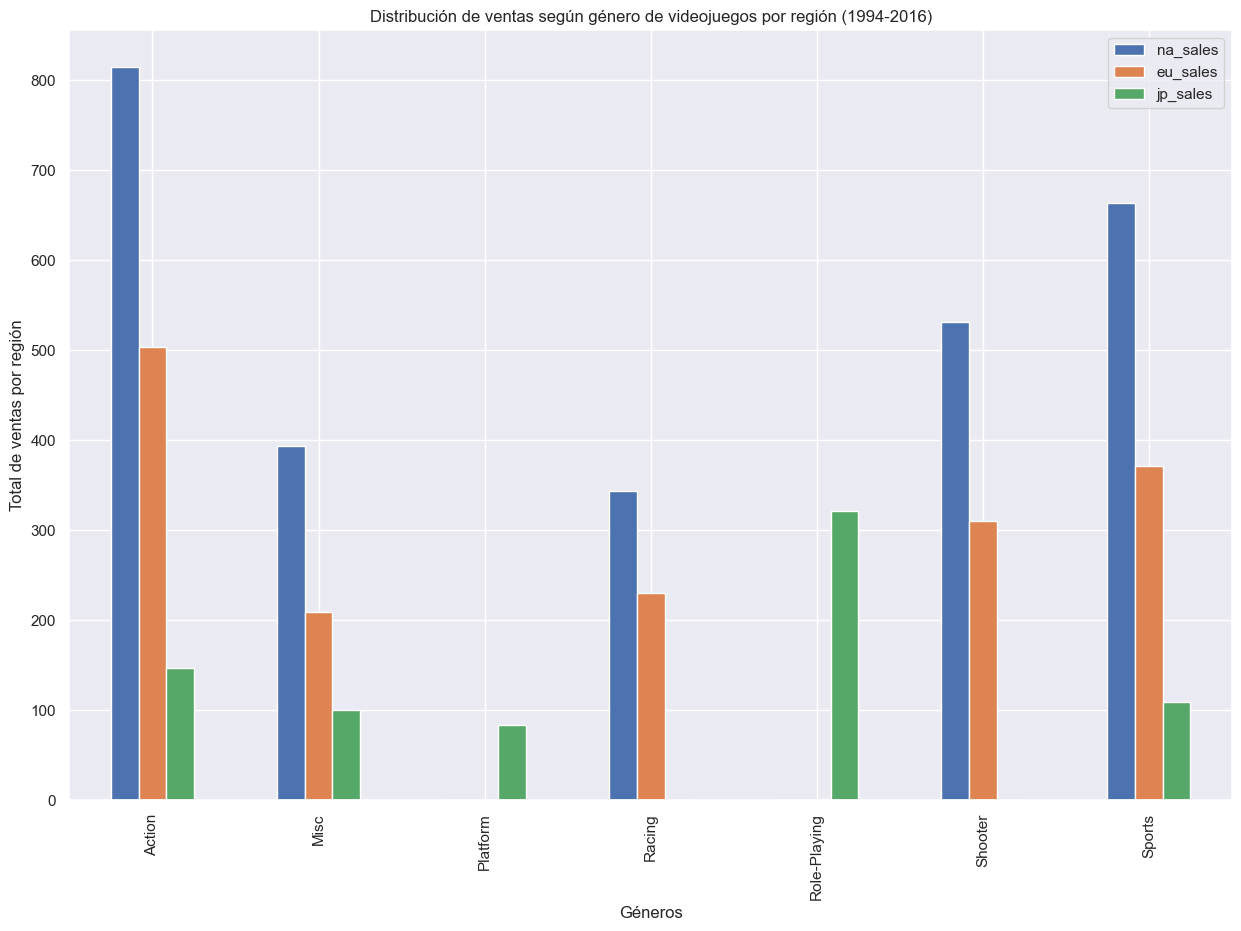

In [50]:
top5_genres_comparison.plot(kind="bar",x="genre",y=["na_sales","eu_sales","jp_sales"],xlabel="Géneros",ylabel="Total de ventas por región",title="Distribución de ventas según género de videojuegos por región (1994-2016)")

Nuevamente, el gráfico demuestra que los géneros más populares son diferentes en cada región. En particular, los usuarios de Japón parecen preferir los géneros de role-playing y plataforma, a diferencia de los usuarios de Norteamérica y Europa. En cambio, se puede apreciar que los usuarios de Norteamérica y Europa parecen tener gustos similares, pues en ambos casos los 5 géneros más populares son los mismos (acción, deportes, shooter,misc y carreras). Finalmente, los géneros que son populares en todas las regiones son los de acción, deportes y misc, confirmando así que en el total de ventas globales los juegos de Acción y Sports hacen parte del Top 2 en ventas globales por género, como se mostró anteriormente. 

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [51]:
na_ratings = df_1994_2016.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()

eu_ratings = df_1994_2016.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).reset_index()

jp_ratings = df_1994_2016.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).reset_index()

In [52]:
ratings_comparison = na_ratings.merge(eu_ratings, how='outer', on='rating')

ratings_comparison = ratings_comparison.merge(jp_ratings, how='outer', on='rating')

ratings_comparison

,rating,na_sales,eu_sales,jp_sales
0,AO,1.26,0.61,0.00
1,E,1281.23,707.37,198.01
2,E10+,345.51,183.33,40.20
3,EC,1.53,0.11,0.00
4,K-A,2.56,0.27,1.46
5,M,742.93,480.25,63.58
6,RP,0.00,0.03,0.00
7,T,747.58,420.99,150.70
8,unknown,904.61,552.73,650.65


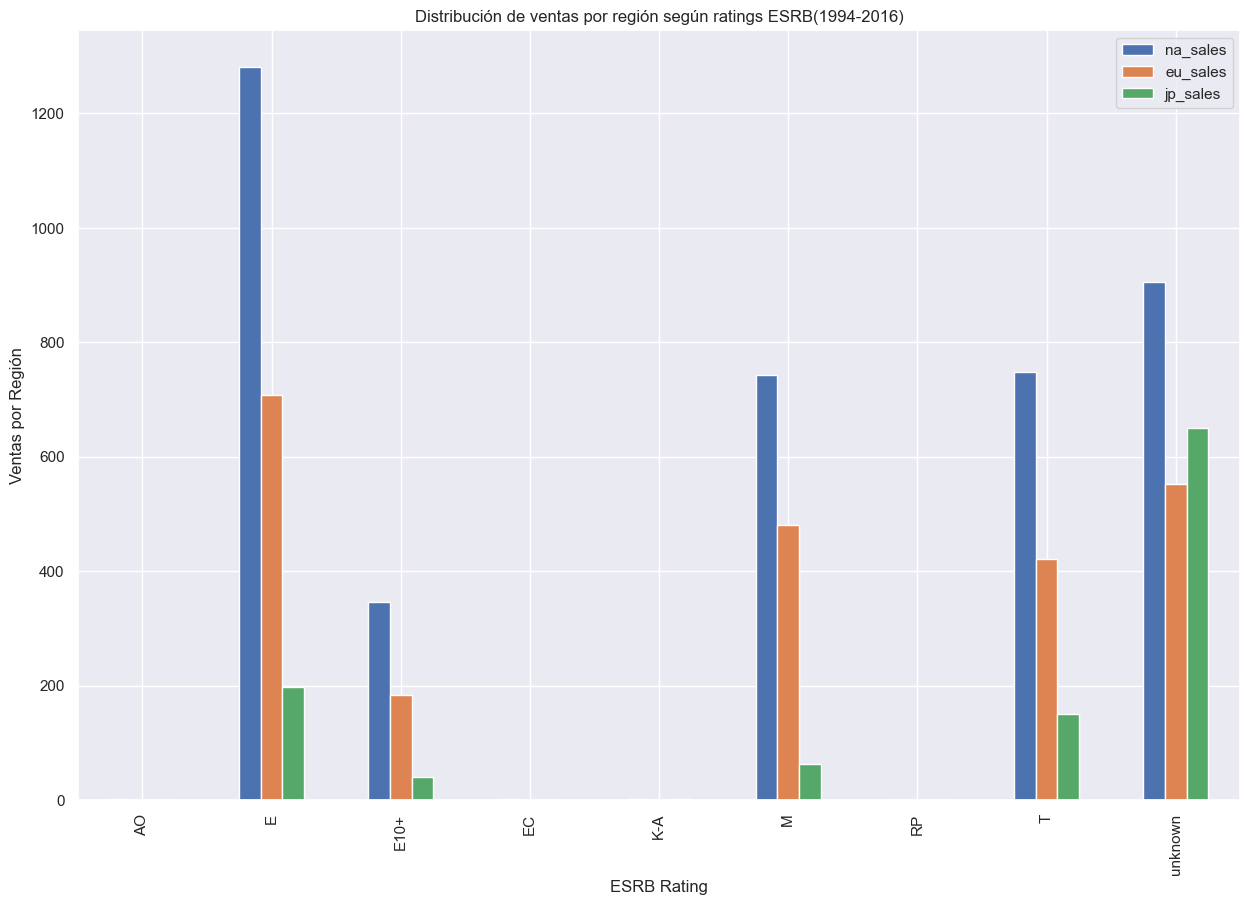

In [53]:
ratings_comparison.plot(x= 'rating',y=['na_sales','eu_sales', 'jp_sales'],kind='bar',title= 'Distribución de ventas por región según ratings ESRB(1994-2016)',xlabel= 'ESRB Rating',ylabel= 'Ventas por Región')
plt.show()

Como se puede ver en el gráfico, una gran parte de ratings corresponde a la categoría "unknown", la cual se definió previamente en la etapa de preprocesamiento de datos. Sin embargo, se puede observar que los videojuegos con rating E (Apto para todo el público) son los que más se venden en las tres regiones. Además, excluyendo la categoría "unknown", otras categorías que también concentran más ventas son las categorías T(Adolescentes) y M( Mature +17 años) principalmente en Norteamérica y Europa, aunque también concentran ventas en Japón. Entonces, se puede decir que las calificaciones influyen en las ventas de los videojuegos, pero los comportamientos por región son muy similares; es decir, el rating en sí afecta las ventas mas no hay variedades en su comportamiento de compra según la región.

## Prueba de hipótesis


Primero se probará la siguiente hipótesis: 

**H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

**H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas**

Se utilizará la prueba T de Student para muestras independientes, ya que es la prueba adecuada para probar la igualdad de las medias de dos poblaciones

In [54]:
# se filtrarán las calificaciones de usuarios para las plataformas Xbox One y PC, estas se almacenarán en dataframes diferentes
df_1994_2016 = df_1994_2016.dropna(subset=["user_score"])
user_score_xone = df_1994_2016[df_1994_2016["platform"]=="XOne"]["user_score"]
user_score_pc = df_1994_2016[df_1994_2016["platform"]=="PC"]["user_score"]

In [55]:
# primero se realizará la prueba de Levene para saber si las varianzas de ambas muestras son iguales o diferentes
# se establecerá como valor alpha 0.05
alpha = 0.05
levene=st.levene(user_score_xone,user_score_pc)
print("valor p:",levene.pvalue)
if levene.pvalue<alpha:
    print("Rechazamos la hipótesis nula:las varianzas son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: las varianzas son iguales")

valor p: 0.30667089592268143
No podemos rechazar la hipótesis nula: las varianzas son iguales


In [56]:
# de acuerdo a los resultados del test de Levene, se considerará la igualdad de varianzas en los parámetros de la prueba T de Student

alpha = 0.05
results=st.ttest_ind(user_score_xone,user_score_pc,equal_var=True)
print("valor p:",results.pvalue)

if results.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 8.712357892524858e-06
Rechazamos la hipótesis nula


Con un nivel de significación de 0.05, los datos proporcionan evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, se puede concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren. 

Ahora se probará la segunda hipótesis:

**H0= Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.**

**H1= Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

Así como en el caso anterior, se utilizará la prueba T de Student para muestras independientes, ya que es la prueba adecuada para probar la igualdad de las medias de dos poblaciones


In [57]:
# se filtrarán las calificaciones de usuarios para los géneros acción y deportes, estas se almacenarán en dataframes diferentes
user_score_action = df_1994_2016[df_1994_2016["genre"]=="Action"]["user_score"]
user_score_sports = df_1994_2016[df_1994_2016["genre"]=="Sports"]["user_score"]

print(user_score_action.describe())
print()
print(user_score_sports.describe())

count    1797.000000
mean        7.058932
std         1.423911
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

count    1088.000000
mean        6.959467
std         1.618648
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64


In [58]:
# primero se realizará la prueba de Levene para saber si las varianzas de ambas muestras son iguales o diferentes
# se establecerá como valor alpha 0.05
alpha = 0.05
levene=st.levene(user_score_action,user_score_sports)
print("valor p:",levene.pvalue)
if levene.pvalue<alpha:
    print("Rechazamos la hipótesis nula:las varianzas son diferentes")
else:
    print("No podemos rechazar la hipótesis nula: las varianzas son iguales")

valor p: 9.15905294891262e-05
Rechazamos la hipótesis nula:las varianzas son diferentes


In [59]:
# de acuerdo a los resultados del test de Levene, se considerará que las varianzas son diferentes en los parámetros de la prueba T de Student

alpha = 0.05
results=st.ttest_ind(user_score_action,user_score_sports,equal_var=False)
print("valor p:",results.pvalue)

if results.pvalue<alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.09455979262895202
No podemos rechazar la hipótesis nula


Con un nivel de significación de 0.05, los datos proporcionan evidencia suficiente para aceptar la hipótesis nula. Eso quiere decir que las calificaciones promedio de los usuarios para los géneros de acción y deportes son iguales.

## Conclusión general

El objetivo general de este proyecto fue identificar patrones que determinen si un videojuego va a tener éxito o no, con la finalidad de identificar proyectos prometedores y planificar campañas publicitarias. Para ello se siguieron los siguientes pasos:

1. Se importaron las librerías necesarias para el análisis y se cargaron los datos en un dataframe general.

2. Se obtuvo un panorama general del dataframe para verificar si existían datos ausentes o duplicados, así como para evaluar si los tipos de datos eran los adecuados. Así, se transformó el tipo de dato de la columna user_score de object a float64. En cuanto a los valores nulos de columnas como name, genre y rating, estos fueron reemplazados con la palabra "unknown". Por otra parte, en el caso de las columnas user_score y critic_score, los valores nulos fueron reemplazados con la media y la mediana respectivamente. Finalmente, se calcularon las ventas totales para cada juego y se agregaron a una nueva columna.

3. Posteriormente, después de explorar la distribución de lanzamientos de videojuegos a lo largo del tiempo y el comportamiento de ventas de las consolas más populares, se determinó que se iban a tomar los datos de 1994 a 2016 para construir el modelo para el 2017. Una vez que se filtraron los datos, se analizaron cuáles eran las plataformas líderes en ventas, la distribución de sus ventas a lo largo de los años a partir de gráficos de lineas y diagramas de caja. Además, se analizó cuáles son los géneros más y menos rentables.

4. Finalmente, se estudió el perfil de los usuarios de cada región en cuanto a las plataformas, géneros y la clasificación de juegos que prefieren. Adicionalmente, se probaron las hipótesis usando la prueba T de Student. 

A partir del análisis se llegaron a las siguientes conclusiones:

1. Las 5 plataformas más rentables son PS2, Xbox 360, PS3, Wii y DS, las cuales superan los 800 millones de dólares en ventas. Además, casos como el de las plataformas de Sony (PS, PS2, PS3) demuestran cómo el surgimiento de consolas que incorporan nuevas tecnologías afectan las ventas que puede generar una consola, pues las más antiguas diminuyen su rentabilidad mientras que la rentabilidad de una nueva consola aumenta. 

2. No se encontraron diferencias significativas en la distribución de las ventas totales por plataforma. De hecho, en promedio los videojuegos de las plataformas más populares no superan el millón de dólares en ventas. Sin embargo, sí se encontró que cada plataforma tiene ciertos videojuegos que destacan muy por encima de los demás en cuanto a sus ventas. Estos corresponderían a los denominados "Best-sellers" de cada plataforma.

3. En cuanto a factores que pueden influir en la cantidad de ventas de videojuegos, a partir del caso de Xbox 360 ,se pudo ver que la calificación de los usuarios no parece influir en el comportamiento de las ventas de una consola. No obstante, se encontró que la calificación de la crítica está ligeramente relacionada con la cantidad de ventas. Es decir, a mayor cantidad de ventas de un videojuego mejor puntuación de la crítica y viceversa. Además, se encontró que la clasificación de los videojuegos influyen en las ventas, pues aquellos con la calificación "E" (Apto para todo público) "T"("Adolescentes) y "M"(Mature +17 años) son los que más venden.

4. Los géneros más rentables son los de acción, deportes y shooter, por lo que se podría esperar que lanzamientos de videojuegos de dichos géneros tengan éxito en ventas. Por otro lado, videojuegos de géneros como puzzle, estrategia o aventura tendrían un menor éxito. 

5. No obstante, para determinar el éxito en ventas de un videojuego también se debe considerar la región en la que es lanzado, pues los usuarios tienen distintas preferencias. Por un lado, a diferencia de Norteamérica y Europa, los jugadores de Japón prefieren consolas como el DS o 3DS, así como videojuegos del género de role-playing. En cambio, los jugadores de Norteamérica y Europa parecen tener gustos similares en cuanto a los géneros de acción, deportes, shooter,misc y carreras.

6. Se debe destacar el rendimiento en ventas de las plataformas de la familia Sony (PS2,PS3), pues estas obtienen buenas ventas en las tres regiones. 

7. En cuanto a las pruebas de hipótesis:
    -  Dados los resultados de las pruebas t de student y con una significancia de 0.05, se concluye que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren. Asimismo, se concluye que las calificaciones promedio de los usuarios para los géneros de acción y deportes son iguales.